# Iris Data

### Classification
Using iris.data, select training dataset and validation dataset and implement SVM algorithm (based on public packages or libraries) to classify the type of iris

### Dimension Reduction
Using iris.data, reduce the dimension of features and extract the first, second and third principal component.

### Classification using Reduced Features
Based on question 2, using the first, second and third principal component, respectively, to train a SVM model to classify the type of iris and compare their accuracy.

Based on question 2,using any combination of the first, second and third principal components to train a SVM model to classify the type of iris and compare their accuracy. 

### Clustering
Using iris.data, select the number (1, 2, 3, 4, 5 and 6) of clustering and implement k-means algorithm (based on public packages or libraries). (5’)

Using PCA to reduce the dimension of features and combine the first, second and third principal components to implement k-means algorithm (based on public packages or libraries). (10’)



In [61]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVR
from sklearn import svm, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

### Iris Data Columns
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [2]:
col_names = ["sepal_length","sepal_width", "petal_length",
                          "petal_width","class"]
iris_data = pd.read_csv('iris.data.txt',names = col_names)

In [3]:
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Impute malformed or non-numerical data - replaced with NAN

I checked if there's missing values, since there's none, there's no need to impute

In [4]:
display(iris_data[iris_data['sepal_length']==None])
display(iris_data[iris_data['sepal_width']==None])
display(iris_data[iris_data['petal_length']==None])
display(iris_data[iris_data['petal_width']==None])

,sepal_length,sepal_width,petal_length,petal_width,class


,sepal_length,sepal_width,petal_length,petal_width,class


,sepal_length,sepal_width,petal_length,petal_width,class


,sepal_length,sepal_width,petal_length,petal_width,class


# Impute Data - Replace NAN with mean value of that feature/column

In [5]:
# adata["normalized-losses-imputed"].fillna(adata['normalized-losses-imputed'].mean(),inplace=True)


Separate features with continuous numerical data

Split train and test data with combined continuous and transformed categorical features (dummy variables)

In [6]:
train = iris_data.sample(frac=0.8, random_state=1)
test = iris_data.loc[~iris_data.index.isin(train.index)]
label_train = train['class']
feat_train = train.drop(['class'
                               ],axis=1)
label_test = test['class']
feat_test = test.drop(['class'
                       ],axis=1)

In [7]:
feat_train.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [8]:
feat_test.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
13,4.3,3.0,1.1,0.1


# SVM

Since risk categories may be considered as discrete values or categories,
Let's train the risk predictor model using svm with the risk scores as classes/labels

In [9]:
classifier = svm.SVC(gamma='auto',kernel='poly',degree=1)
classifier.fit(feat_train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predict the test set and evaluate using precision, recall, f1-measure. Shown here also is the confusion matrix, a good way of inspecting where the models got it wrong.

In [10]:
classifier = svm.SVC(gamma='auto',kernel='poly',degree=1,random_state=50)
classifier.fit(feat_train, label_train)
expected = label_test
predicted = classifier.predict(feat_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=50, shrinking=True,
  tol=0.001, verbose=False):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

    avg / total       1.00      1.00      1.00        30


Confusion matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


# PCA

Normalize the features using StandardScaler since PCA is affected by different range of values

In [11]:
feat_normalizer = StandardScaler().fit(feat_train)

In [12]:
feat_train_norm = feat_normalizer.transform(feat_train)
feat_test_norm = feat_normalizer.transform(feat_test)

In [13]:
feat_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [14]:
pd_train_norm = pd.DataFrame(feat_train_norm,columns=feat_cols)
pd_test_norm = pd.DataFrame(feat_test_norm,columns=feat_cols)

In [15]:
display(pd_train_norm.head())
display(pd_test_norm.head())

,sepal_length,sepal_width,petal_length,petal_width
0,-0.107490,2.070335,-1.465511,-1.340393
1,-0.951333,-1.332956,-0.456746,-0.176708
2,0.856903,-0.198525,0.327849,0.211187
3,-0.589686,1.843449,-1.409469,-1.081796
4,2.424041,1.616563,1.448698,0.986977


,sepal_length,sepal_width,petal_length,petal_width
0,-0.951333,0.935905,-1.353426,-1.340393
1,-1.192431,-0.198525,-1.353426,-1.340393
2,-1.071882,0.709019,-1.297384,-1.340393
3,-1.795177,-0.425411,-1.353426,-1.340393
4,-1.915726,-0.198525,-1.521554,-1.469691


get principal components

In [16]:
pca = PCA(n_components=3)
pca = pca.fit(pd_train_norm)
principalComponents_train = pca.transform(pd_train_norm)
iris_pca_train = pd.DataFrame(data = principalComponents_train
             , columns = ['pc_1', 'pc_2', 'pc_3'])

principalComponents_test = pca.transform(pd_test_norm)
iris_pca_test = pd.DataFrame(data = principalComponents_test
             , columns = ['pc_1', 'pc_2', 'pc_3'])

In [17]:
display(iris_pca_train.head())
display(iris_pca_test.head())

,pc_1,pc_2,pc_3
0,-2.249311,1.713652,-0.459034
1,-0.474619,-1.623440,0.157829
2,0.807606,0.181878,-0.482085
3,-2.255370,1.334786,-0.000317
4,2.184308,2.552641,-0.478325


,pc_1,pc_2,pc_3
0,-2.296311,0.345453,-0.128771
1,-2.097104,-0.788474,-0.247735
2,-2.261360,0.091986,-0.092132
3,-2.343461,-1.234253,0.125963
4,-2.640544,-1.088479,0.163552


### Display the principal components

In [18]:
# the component axes from the original feature space
display(pca.components_)
# the variance of each PC
display(pca.explained_variance_)
# the percentage of variance explained by each PC
display(pca.explained_variance_ratio_)

array([[ 0.51611345, -0.28528909,  0.57883182,  0.56319692],
       [ 0.39492064,  0.91562498,  0.03359609,  0.0673787 ],
       [-0.71681243,  0.25720912,  0.15319875,  0.62972499]])

array([ 2.95763542,  0.9033062 ,  0.15259275])

array([ 0.73324711,  0.22394466,  0.03783029])

In [19]:
#sum of the percentage ratios
sum(pca.explained_variance_ratio_)

0.99502206154066464

# Classify using the PCA reduced-features
Use all 3 PC's

In [20]:
classifier_pca3 = svm.SVC(gamma='auto',kernel='poly',degree=1,random_state=50)
classifier_pca3.fit(iris_pca_train, label_train)
expected = label_test
predicted_pca3 = classifier_pca3.predict(iris_pca_test)
print("Classification report for classifier using PC 1,2,3 %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted_pca3)))
print("Confusion matrix using PC 1,2,3:\n%s" % metrics.confusion_matrix(expected, predicted_pca3))

Classification report for classifier using PC 1,2,3 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=50, shrinking=True,
  tol=0.001, verbose=False):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.75      0.86      0.80         7

    avg / total       0.91      0.90      0.90        30


Confusion matrix using PC 1,2,3:
[[10  0  0]
 [ 0 11  2]
 [ 0  1  6]]


## We see a slight dip in prediction accuracy with 91% precision, 90% recall, 90% f-measure


In [21]:
print("Classification report for classifier using original features %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix using original features:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier using original features SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=50, shrinking=True,
  tol=0.001, verbose=False):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

    avg / total       1.00      1.00      1.00        30


Confusion matrix using original features:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


# Classify using different combination of PC's 
Use PC-1 and PC-3

In [22]:
iris_pca13_train = pd.DataFrame(data = principalComponents_train[:,[0,2]]
             , columns = ['pc_1', 'pc_3'])
iris_pca13_test = pd.DataFrame(data = principalComponents_test[:,[0,2]]
             , columns = ['pc_1', 'pc_3'])
classifier_pca13 = svm.SVC(gamma='auto',kernel='poly',degree=1,random_state=50)
classifier_pca13.fit(iris_pca13_train, label_train)
expected = label_test
predicted_pca13 = classifier_pca13.predict(iris_pca13_test)
print("Classification report for classifier using PC-1 and PC-3 %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted_pca13)))
print("Confusion matrix using PC-1 and PC-3:\n%s" % metrics.confusion_matrix(expected, predicted_pca13))

Classification report for classifier using PC-1 and PC-3 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=50, shrinking=True,
  tol=0.001, verbose=False):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

    avg / total       0.97      0.97      0.97        30


Confusion matrix using PC-1 and PC-3:
[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]


Use PC-1 and PC-2

In [23]:
iris_pca12_train = pd.DataFrame(data = principalComponents_train[:,[0,1]]
             , columns = ['pc_1', 'pc_2'])
iris_pca12_test = pd.DataFrame(data = principalComponents_test[:,[0,1]]
             , columns = ['pc_1', 'pc_2'])
classifier_pca12 = svm.SVC(gamma='auto',kernel='poly',degree=1,random_state=50)
classifier_pca12.fit(iris_pca12_train, label_train)
expected = label_test
predicted_pca12 = classifier_pca12.predict(iris_pca12_test)
print("Classification report for classifier using PC-1 and PC-2 %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted_pca12)))
print("Confusion matrix using PC-1 and PC-2:\n%s" % metrics.confusion_matrix(expected, predicted_pca12))

Classification report for classifier using PC-1 and PC-2 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=50, shrinking=True,
  tol=0.001, verbose=False):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

    avg / total       0.95      0.93      0.93        30


Confusion matrix using PC-1 and PC-2:
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


In [24]:
iris_pca23_train = pd.DataFrame(data = principalComponents_train[:,[0,1]]
             , columns = ['pc_2', 'pc_3'])
iris_pca23_test = pd.DataFrame(data = principalComponents_test[:,[0,1]]
             , columns = ['pc_2', 'pc_3'])
classifier_pca23 = svm.SVC(gamma='auto',kernel='poly',degree=1,random_state=50)
classifier_pca23.fit(iris_pca23_train, label_train)
expected = label_test
predicted_pca23 = classifier_pca23.predict(iris_pca23_test)
print("Classification report for classifier using PC-2 and PC-3 %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted_pca23)))
print("Confusion matrix using PC-2 and PC-3:\n%s" % metrics.confusion_matrix(expected, predicted_pca23))

Classification report for classifier using PC-2 and PC-3 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=50, shrinking=True,
  tol=0.001, verbose=False):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

    avg / total       0.95      0.93      0.93        30


Confusion matrix using PC-2 and PC-3:
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


# Clustering

Using iris.data, select the number (1, 2, 3, 4, 5 and 6) of clustering and implement k-means algorithm (based on public packages or libraries). (5’)

Using PCA to reduce the dimension of features and combine the first, second and third principal components to implement k-means algorithm (based on public packages or libraries). (10’)

# Kmeans Clustering

In [27]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_feat = iris_data.drop(['class'],axis=1)

In [34]:
iris_class = iris_data['class']

In [29]:
iris_feat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(iris_feat)
y_3means = kmeans.predict(iris_feat)
y_3means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Normalize the Data before feeding it to Kmeans

In [73]:
iris_feats_norm = feat_normalizer.fit_transform(iris_feat)
feat_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pd_feat_norm = pd.DataFrame(iris_feats_norm,columns=feat_cols)

In [74]:
pd_feat_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [89]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(pd_feat_norm)
y_3means = kmeans.predict(pd_feat_norm)
y_3means
pd_feat_norm['predicted'] = y_3means

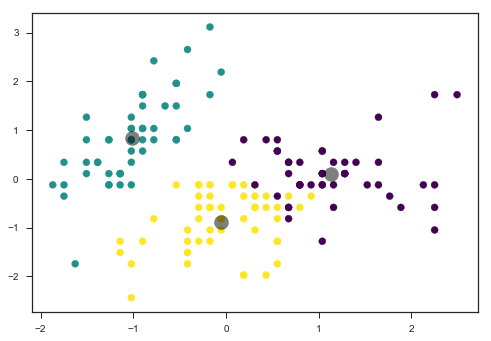

In [92]:
plt.scatter(pd_feat_norm.sepal_length, pd_feat_norm.sepal_width,c=y_3means, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

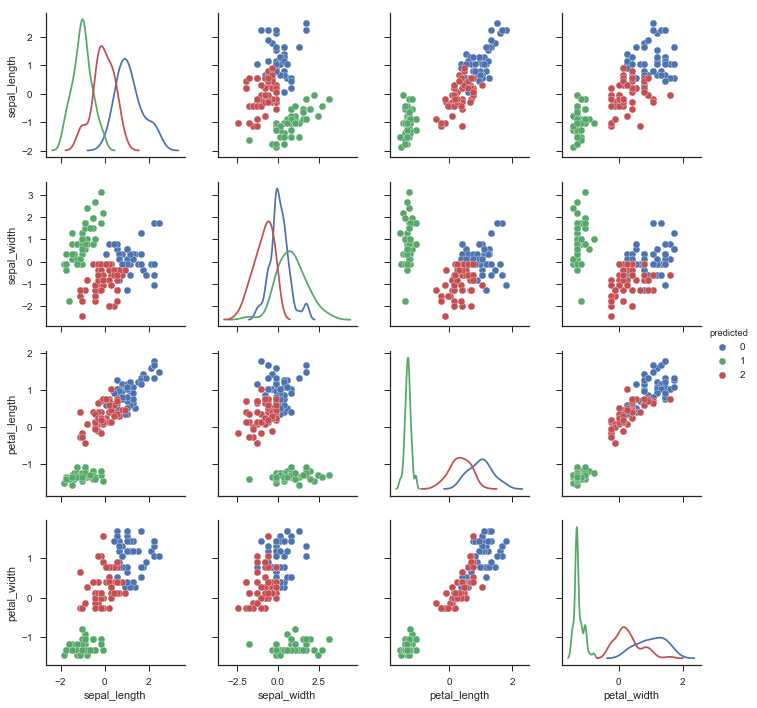

In [93]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(pd_feat_norm,hue="predicted",diag_kind="kde",vars=["sepal_length","sepal_width","petal_length","petal_width"])

# Kmeans + PCA

In [78]:
pca = PCA(n_components=3)
pca = pca.fit(pd_feat_norm)
principalComponents_iris = pca.transform(pd_feat_norm)
iris_pca = pd.DataFrame(data = principalComponents_iris
             , columns = ['pc_1', 'pc_2', 'pc_3'])

In [79]:
iris_pca.head()

,pc_1,pc_2,pc_3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [83]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(iris_pca)
y_pca3_3means = kmeans.predict(iris_pca)
y_pca3_3means
iris_pca['predicted']=y_pca3_3means

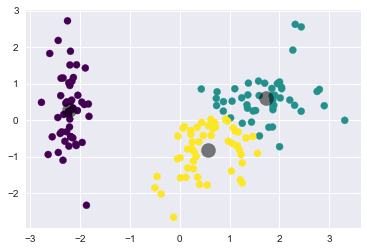

In [84]:
plt.scatter(iris_pca['pc_1'], iris_pca['pc_2'],c=y_pca3_3means, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


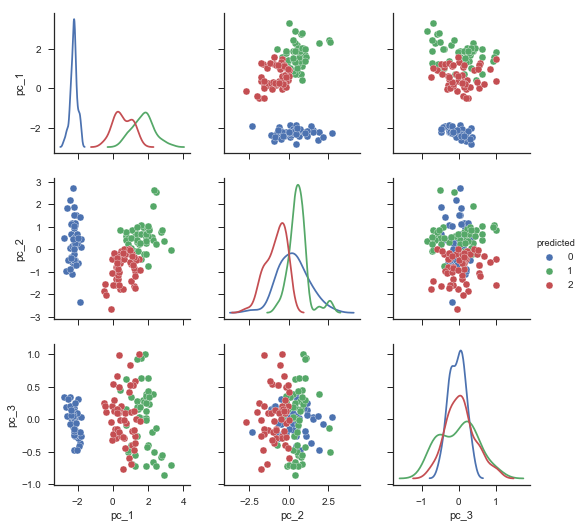

In [88]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris_pca,hue="predicted",diag_kind="kde",vars=["pc_1", "pc_2","pc_3"])